In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
path='/Users/rae/Desktop/datasets 2/Brazil/'

In [3]:
order=pd.read_csv(path+'olist_orders_dataset.csv')
item=pd.read_csv('/Users/rae/Desktop/datasets 2/Brazil/olist_order_items_dataset.csv')
pay=pd.read_csv('/Users/rae/Desktop/datasets 2/brazil/olist_order_payments_dataset.csv')
cat=pd.read_csv('/Users/rae/Desktop/datasets 2/Brazil/product_category_name_translation.csv')
pro=pd.read_csv('/Users/rae/Desktop/datasets 2/Brazil/olist_products_dataset.csv')
cus=pd.read_csv('/Users/rae/Desktop/datasets 2/Brazil/olist_customers_dataset.csv')
seller=pd.read_csv('/Users/rae/Desktop/datasets 2/Brazil/olist_sellers_dataset.csv')
rew=pd.read_csv('/Users/rae/Desktop/datasets 2/Brazil/olist_order_reviews_dataset.csv')

In [4]:
result = pd.merge(order,item,on='order_id')
result = pd.merge(result,pro,on='product_id')
result = pd.merge(result,cat,on='product_category_name')
result = pd.merge(result,cus,on='customer_id')
result = pd.merge(result,rew,on='order_id')
result = pd.merge(result,seller,on='seller_id')
result = pd.merge(result,pay,on='order_id')

In [5]:
df = result[['order_id', 'customer_id','customer_unique_id', 'seller_id', 'order_status', 'price','payment_value', 
              'product_category_name_english','product_photos_qty', 'review_score','product_weight_g','payment_installments',
              'order_purchase_timestamp','order_delivered_customer_date','freight_value',
             'customer_state','seller_state','payment_type'
             ]].copy()

In [6]:
df.shape

(115609, 18)

In [7]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

In [8]:
df.dtypes


order_id                                 object
customer_id                              object
customer_unique_id                       object
seller_id                                object
order_status                             object
price                                   float64
payment_value                           float64
product_category_name_english            object
product_photos_qty                      float64
review_score                              int64
product_weight_g                        float64
payment_installments                      int64
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date            object
freight_value                           float64
customer_state                           object
seller_state                             object
payment_type                             object
dtype: object

In [9]:
df.describe()

,price,payment_value,product_photos_qty,review_score,product_weight_g,payment_installments,freight_value
count,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115609.000000,115609.000000
mean,120.619850,172.387379,2.205373,4.034409,2113.907697,2.946233,20.056880
std,182.653476,265.873969,1.717771,1.385584,3781.754895,2.781087,15.836184
min,0.850000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,39.900000,60.870000,1.000000,4.000000,300.000000,1.000000,13.080000
50%,74.900000,108.050000,1.000000,5.000000,700.000000,2.000000,16.320000
75%,134.900000,189.480000,3.000000,5.000000,1800.000000,4.000000,21.210000
max,6735.000000,13664.080000,20.000000,5.000000,40425.000000,24.000000,409.680000


# Part III: EDA

In [10]:
df['order_date']=df.order_purchase_timestamp.dt.date
df['month']=df.order_purchase_timestamp.dt.to_period('M')
df['weekday']=df.order_purchase_timestamp.dt.day_name()
df['hour']=df.order_purchase_timestamp.dt.hour

In [11]:
df[['order_date','month','weekday','hour']].head()

,order_date,month,weekday,hour
0,2017-10-02,2017-10,Monday,10
1,2017-10-02,2017-10,Monday,10
2,2017-10-02,2017-10,Monday,10
3,2017-08-15,2017-08,Tuesday,18
4,2017-08-02,2017-08,Wednesday,18


In [12]:
sns.set_style('whitegrid')

In [13]:
def plot_hist(df,col,bin):
    plt.figure(figsize=(16,7))
    
    plt.subplot(1,2,1)
    plt.title('Histogram of '+col)
    sns.histplot(df[col], color='teal',kde_kws={'shade':True}, bins=bin);
    
    plt.subplot(1,2,2)
    plt.title('Histogram of '+col+'(after remove outlier)')
    sns.histplot(df[ df[col]<df[col].mean()+3*df[col].std() ][col], color='orange',kde_kws={'shade':True}, bins=bin);

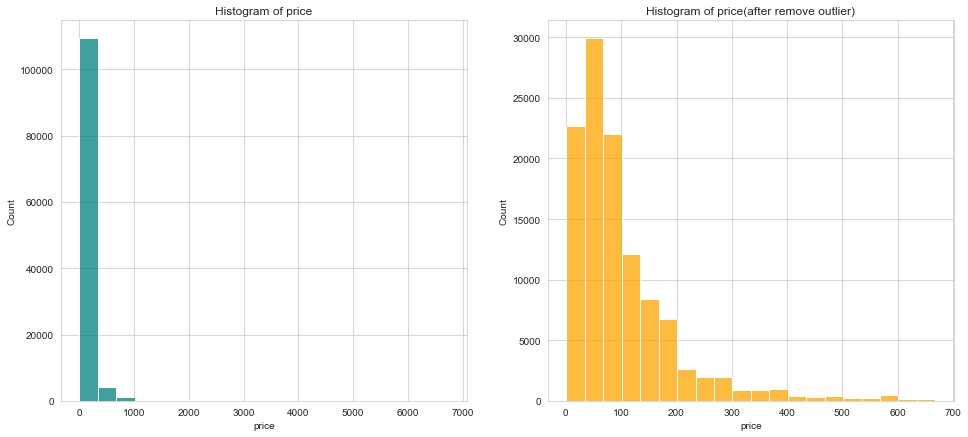

In [14]:
plot_hist(df,"price",bin=20)

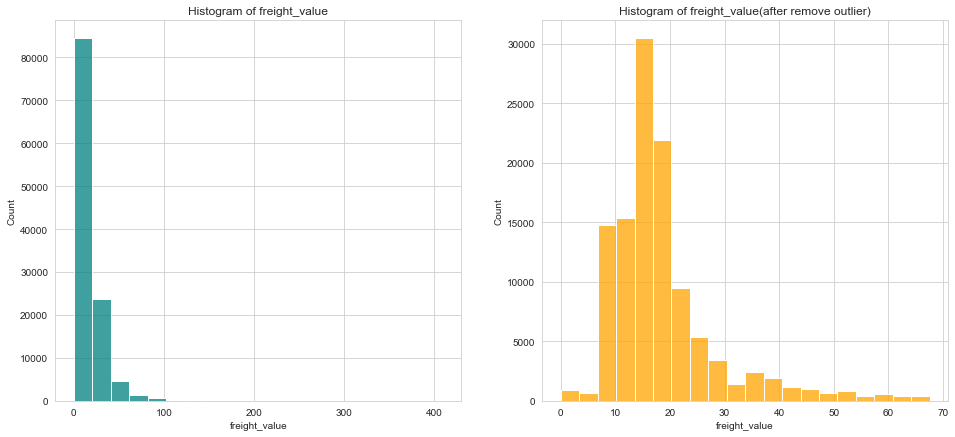

In [15]:
plot_hist(df,'freight_value',bin=20)

Text(0.5, 1.0, 'totle order price over months')

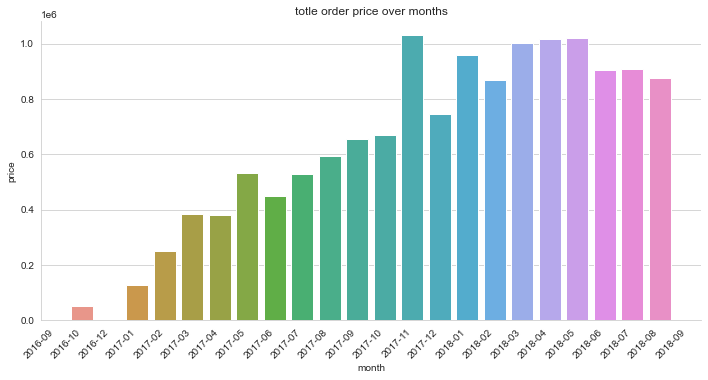

In [16]:
sns.catplot(data=df.groupby(['month'],as_index=False).agg({"price":sum}),
            x='month',y='price',kind='bar',aspect=2).set_xticklabels(rotation=45,horizontalalignment='right')
plt.title('totle order price over months')

Text(0.5, 1.0, 'totle price by weekdays')

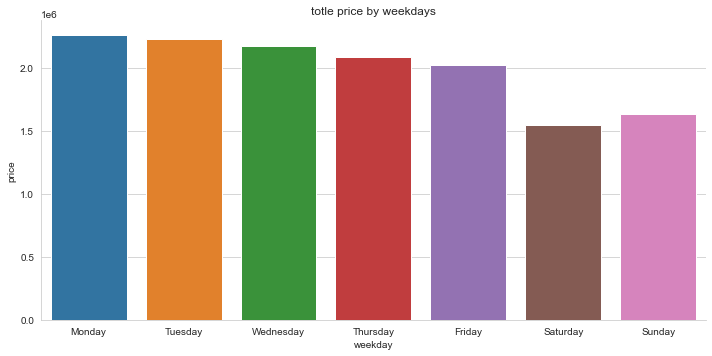

In [17]:
sns.catplot(data=df.groupby(['weekday'],as_index=False).agg({"price":sum}),
           x='weekday', y='price',kind='bar',aspect=2,
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('totle price by weekdays')

Text(0.5, 1.0, 'review_score by month')

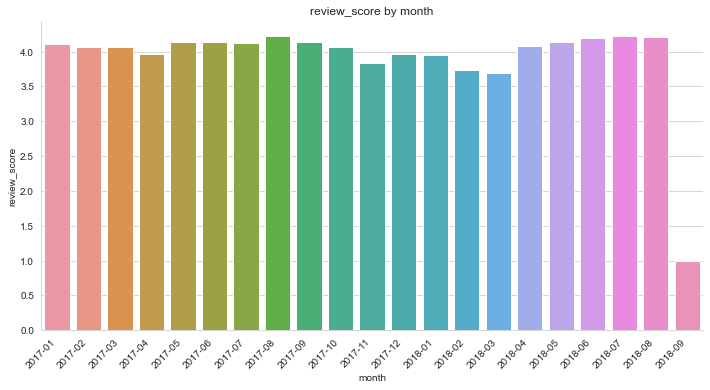

In [18]:
sns.catplot(data=df[df['month']>='2017-01'].groupby(['month'],as_index=False).agg({'review_score':np.mean}),
           x='month',y='review_score',kind='bar',aspect=2).set_xticklabels(rotation=45,horizontalalignment='right')
plt.title('review_score by month')

In [19]:
df1=df.groupby('product_category_name_english').agg({'price':sum}
                                                   ).rename(columns={'price':'total_sales'}).reset_index(
                                                   ).sort_values(by = "total_sales",ascending=False)

df1.head()

,product_category_name_english,total_sales
43,health_beauty,1290883.52
70,watches_gifts,1245783.11
7,bed_bath_table,1095770.05
65,sports_leisure,1022489.29
15,computers_accessories,944992.54


Text(0.5, 1.0, 'Total order price across product categories(top 15)')

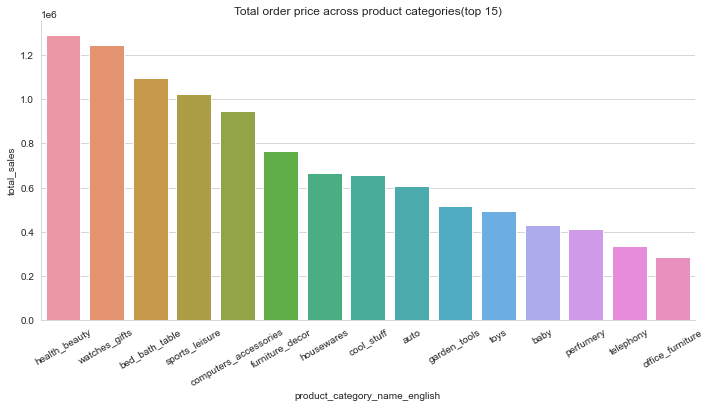

In [20]:
sns.catplot(data=df1[0:15],x='product_category_name_english',y='total_sales',kind='bar',aspect=2
                                                                                    ).set_xticklabels(rotation=30)
plt.title('Total order price across product categories(top 15)')

<AxesSubplot:>

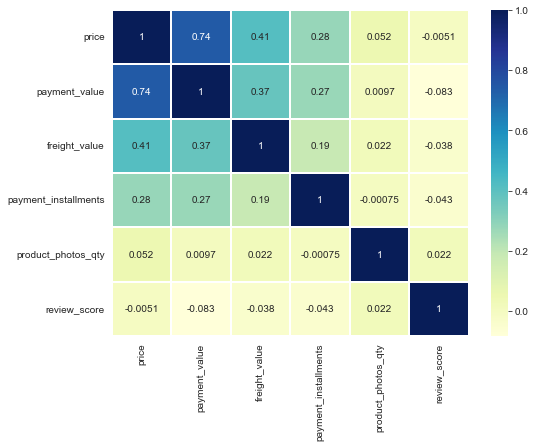

In [21]:
df_num=df[['price', 'payment_value' ,'freight_value', 'payment_installments', 'product_photos_qty', 'review_score']]
cor=df_num.corr()

plt.figure(figsize=(8,6))
sns.heatmap(data=cor,cmap="YlGnBu",annot=True,linewidths=0.4, )

# Part IV: RFM Metrics Calculation

In [22]:
rfm=df.groupby('customer_unique_id').agg({
    
    'order_purchase_timestamp': [('last','max'),('first',"min")],
    'price':[('total','sum')],
    'customer_unique_id':[('purchase#','count')],
    'review_score':[('avg_review','mean')],
    'payment_installments':[('avg_pay_install','mean')]
})


rfm.columns=rfm.columns.droplevel(0)
rfm=rfm.reset_index()

rfm.head()

,customer_unique_id,last,first,total,purchase#,avg_review,avg_pay_install
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,129.90,1,5.0,8.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,18.90,1,4.0,1.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,69.00,1,3.0,8.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,25.99,1,4.0,4.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,180.00,1,5.0,6.0


#Recency

In [23]:
rfm.dtypes

customer_unique_id            object
last                  datetime64[ns]
first                 datetime64[ns]
total                        float64
purchase#                      int64
avg_review                   float64
avg_pay_install              float64
dtype: object

In [24]:
maxtime=max(rfm['last'])
maxtime

Timestamp('2018-09-03 09:06:57')

In [25]:
rfm['recency']=maxtime-rfm['last']
rfm.head()

,customer_unique_id,last,first,total,purchase#,avg_review,avg_pay_install,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,129.90,1,5.0,8.0,115 days 22:10:30
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,18.90,1,4.0,1.0,118 days 21:55:30
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,69.00,1,3.0,8.0,541 days 12:01:54
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,25.99,1,4.0,4.0,325 days 12:37:16
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,180.00,1,5.0,6.0,292 days 13:21:15


In [26]:
rfm['recency']=rfm['recency'].astype('timedelta64[D]')
rfm.head()

,customer_unique_id,last,first,total,purchase#,avg_review,avg_pay_install,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,129.90,1,5.0,8.0,115.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,18.90,1,4.0,1.0,118.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,69.00,1,3.0,8.0,541.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,25.99,1,4.0,4.0,325.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,180.00,1,5.0,6.0,292.0


In [27]:
#length

In [28]:
rfm['length']=rfm['last']-rfm['first']
rfm['length']=rfm['length'].astype('timedelta64[D]')
rfm.head()

,customer_unique_id,last,first,total,purchase#,avg_review,avg_pay_install,recency,length
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,129.90,1,5.0,8.0,115.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,18.90,1,4.0,1.0,118.0,0.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,69.00,1,3.0,8.0,541.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,25.99,1,4.0,4.0,325.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,180.00,1,5.0,6.0,292.0,0.0


In [29]:
rfm['length'].describe()

count    93396.000000
mean         2.631419
std         25.079281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        633.000000
Name: length, dtype: float64

#monetary & frequency

In [30]:
rfm.rename(columns={'total':'monetary',   'purchase#':'frequency',  'avg_review':'rating'},inplace=True)

rfm.head()

,customer_unique_id,last,first,monetary,frequency,rating,avg_pay_install,recency,length
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,129.90,1,5.0,8.0,115.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,18.90,1,4.0,1.0,118.0,0.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,69.00,1,3.0,8.0,541.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,25.99,1,4.0,4.0,325.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,180.00,1,5.0,6.0,292.0,0.0


In [31]:
rfm_final=rfm[['customer_unique_id','recency','frequency','monetary','length','rating','avg_pay_install']]
rfm_final.head()

,customer_unique_id,recency,frequency,monetary,length,rating,avg_pay_install
0,0000366f3b9a7992bf8c76cfdf3221e2,115.0,1,129.90,0.0,5.0,8.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118.0,1,18.90,0.0,4.0,1.0
2,0000f46a3911fa3c0805444483337064,541.0,1,69.00,0.0,3.0,8.0
3,0000f6ccb0745a6a4b88665a16c9f078,325.0,1,25.99,0.0,4.0,4.0
4,0004aac84e0df4da2b147fca70cf8255,292.0,1,180.00,0.0,5.0,6.0


In [32]:
rfm_final.to_csv('/Users/rae/Desktop/jiuzhang--Rae--practice/rfm_final.csv',index=False)

# Part V: RFM Metrics EDA

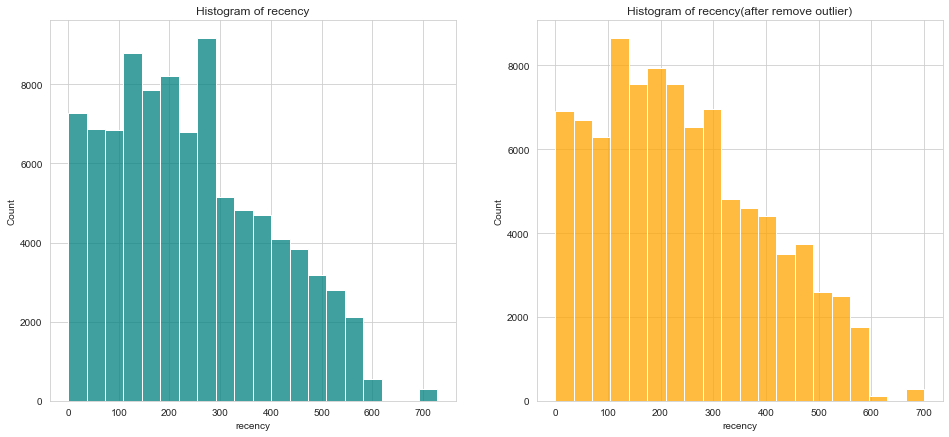

In [33]:
plot_hist(rfm_final,'recency',20)

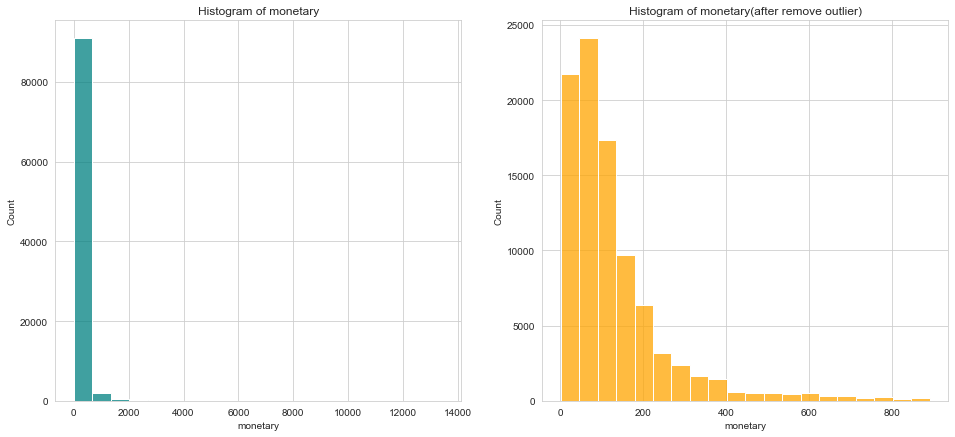

In [34]:
plot_hist(rfm_final,'monetary',20)

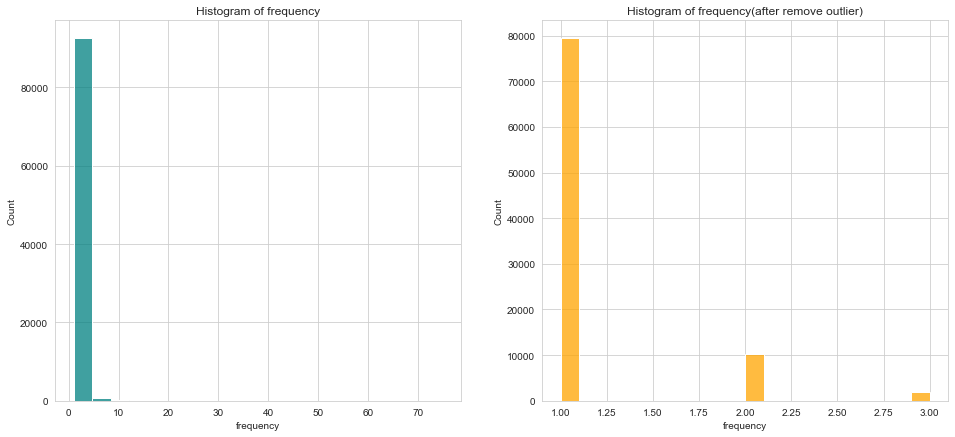

In [35]:
plot_hist(rfm_final,'frequency',20)

Text(0.5, 1.0, 'Frequency count plot')

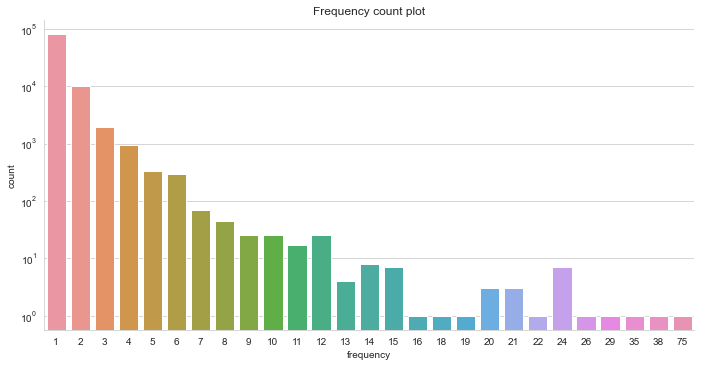

In [36]:
sns.catplot(data=rfm_final,x='frequency',kind='count',aspect=2).set(yscale='log')
plt.title('Frequency count plot')

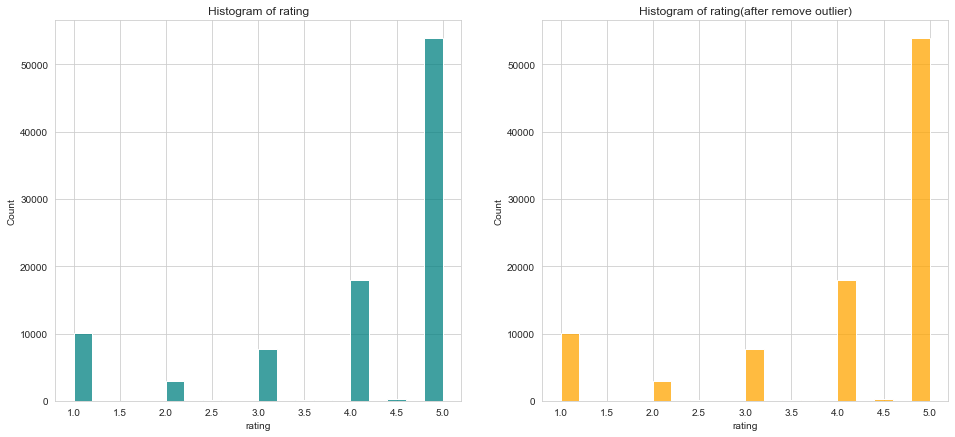

In [37]:
plot_hist(rfm_final,'rating',20)

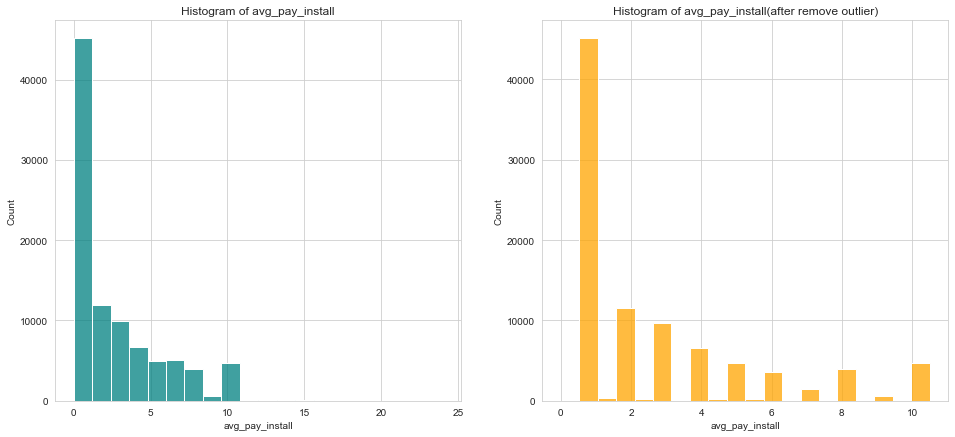

In [38]:
plot_hist(rfm_final,'avg_pay_install',20)

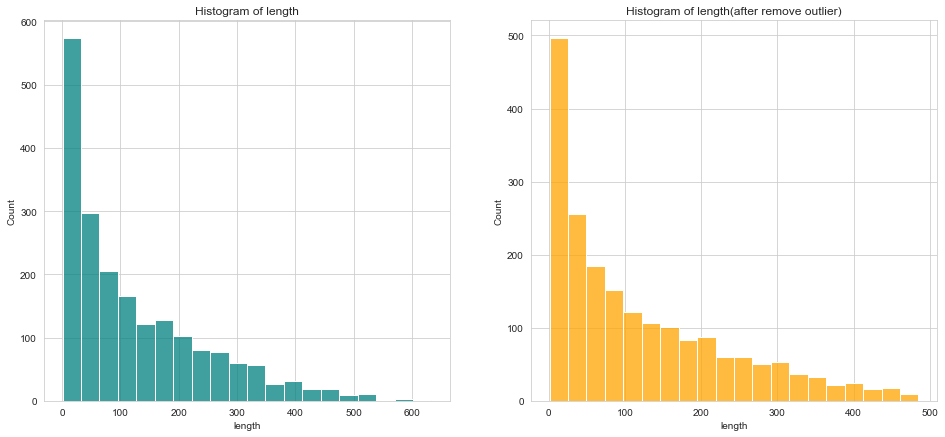

In [39]:
plot_hist(rfm_final[rfm_final['length']>0],'length',20)

<AxesSubplot:>

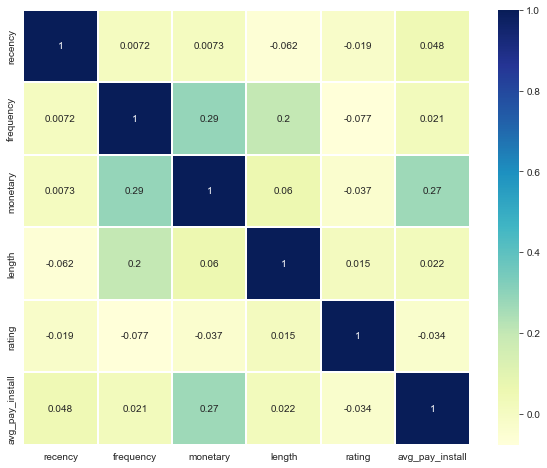

In [40]:
cor=rfm_final.corr()

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='YlGnBu',linewidths=0.4)

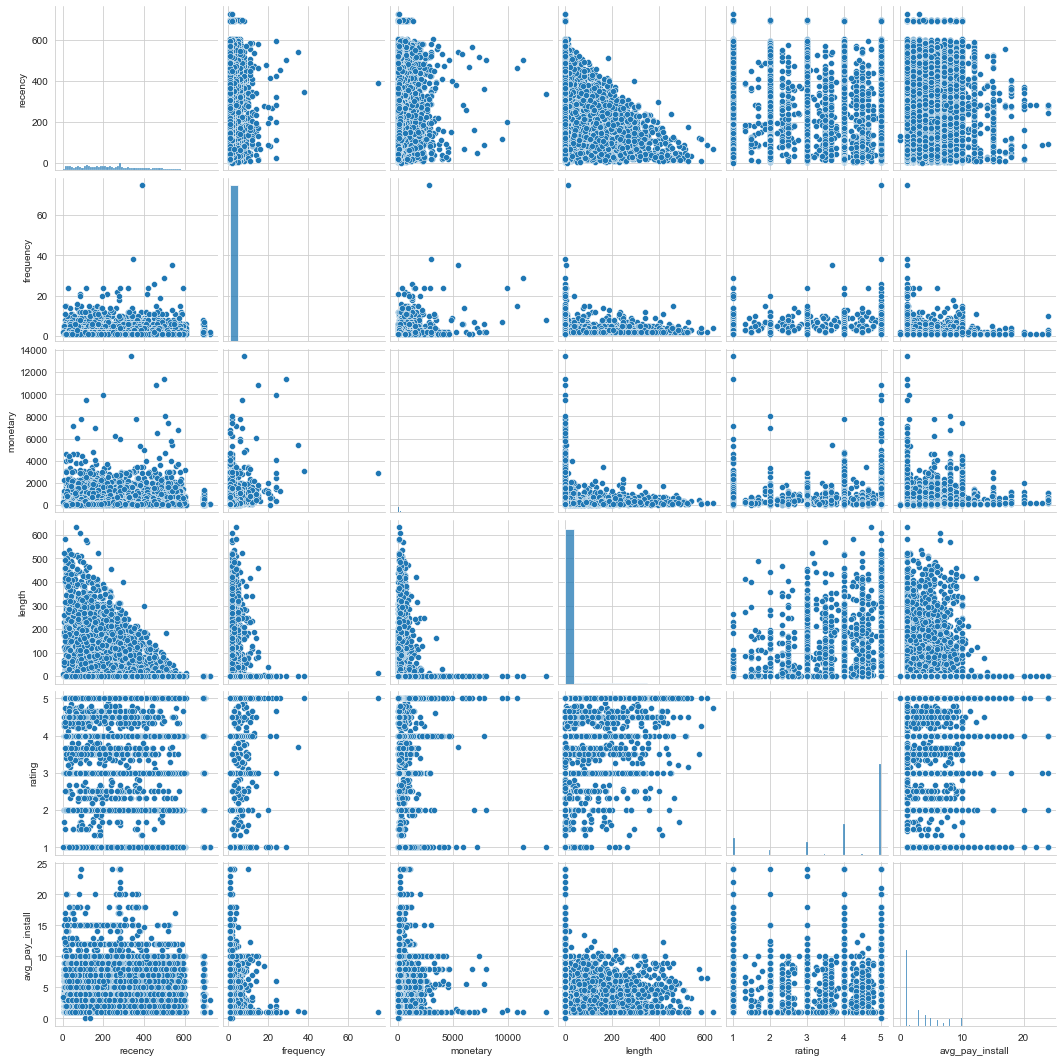

In [41]:
sns.pairplot(data=rfm_final)